In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("Amazon Sale Report.csv",encoding = "unicode escape")

In [49]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.drop(["New","PendingS"],axis=True,inplace = True)

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [9]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [12]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [13]:
df["ship-postal-code"] = df["ship-postal-code"].astype("int")
df["Category"] = df["Category"].astype("str")

In [14]:
df["Date"] = pd.to_datetime(df["Date"])

In [15]:
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int32
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [16]:
df.rename(columns={"Qty" : "Quantity"},inplace = True)

In [17]:
df[["Quantity","Amount","Status"]].describe(include = "object")

,Status
count,37514
unique,11
top,Shipped - Delivered to Buyer
freq,28741


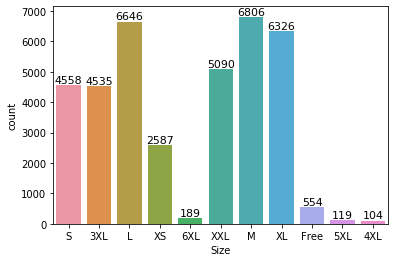

In [18]:
ax = sns.countplot(x= "Size", data = df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

##### From above graph we can see that most of the people buys M-size , L and XL .


In [19]:
Qty_size = df.groupby(["Size"],as_index = False)["Quantity"].sum().sort_values(by="Quantity",ascending = False)
Qty_size

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


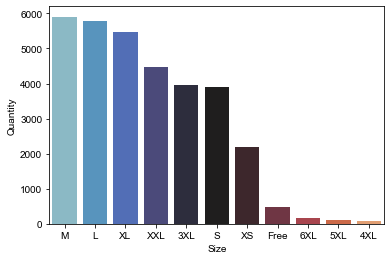

In [20]:
sns.barplot(x = "Size" , y = "Quantity" ,data = Qty_size, palette = "icefire")
sns.set(rc={"figure.figsize" : (20,5)})
plt.show()

### From  above graph we can see that  Quantity of M-size buys most as compair to others .

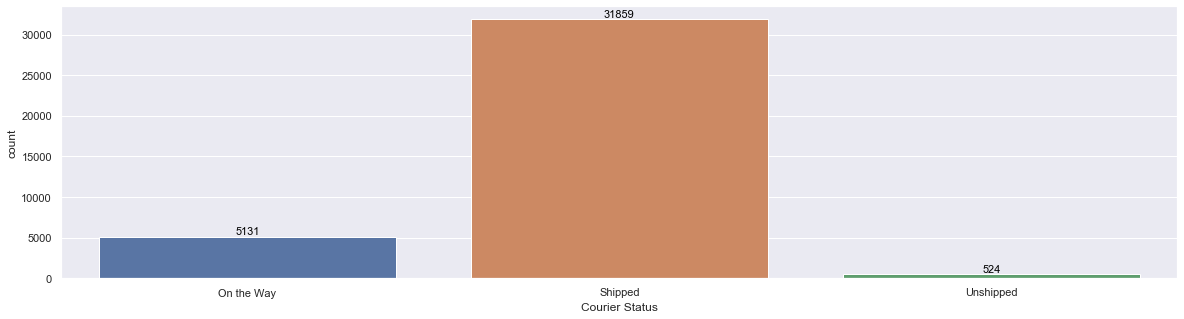

In [21]:
ax = sns.countplot(x = "Courier Status",data =df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
sns.set(rc={"figure.figsize" : (20,5)})

##### From above graph we can see that most of the orders get shipped

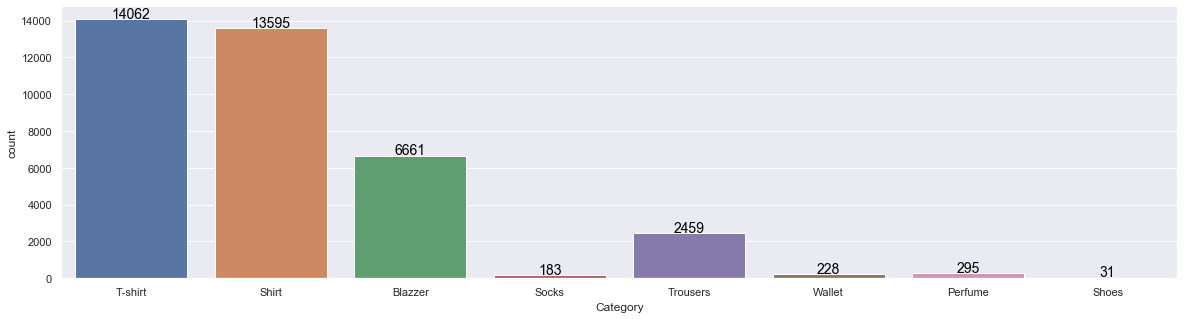

In [22]:
ax = sns.countplot(df['Category'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

##### From above graph we can see that buyers are intrested to buy T-shirts ,Shirt and Blazzer .

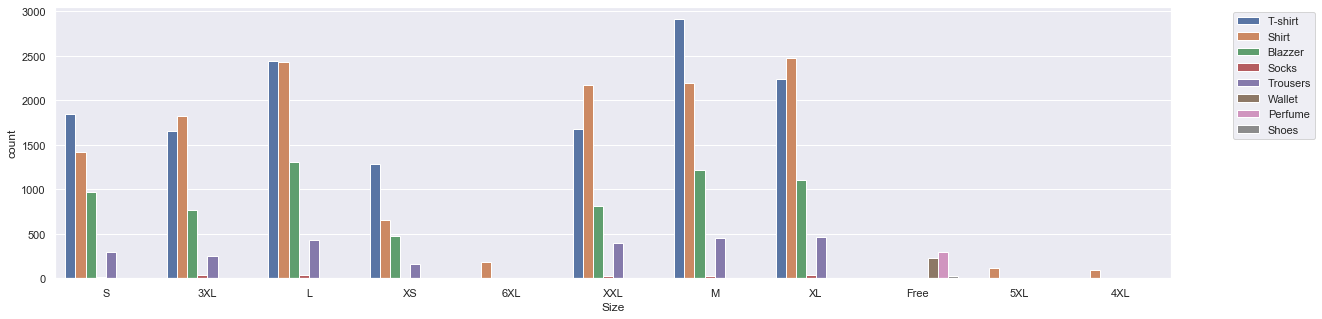

In [23]:
ax =sns.countplot(x="Size",data = df ,hue = "Category" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###  From above graph we can see that buyers are intrested to buy T-shirts ,Shirt and Blazzer which are belongs to "M" , "XL" and "L" size .

In [24]:
B2B_check= df["B2B"].value_counts()

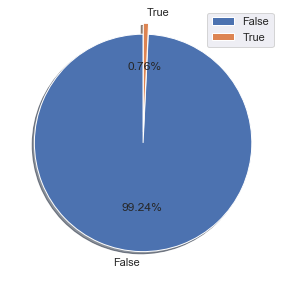

In [25]:
plt.pie(B2B_check,shadow=True,explode=[0,0.1],autopct="%1.2f%%",labels=["False","True"],startangle=90)
plt.legend()
plt.show()

##### From above graph we can see that most of the buyers are retailers i.e. 99.24% and few buyers are doing B2B (wholsaler) i.e. 0.76% .

In [26]:
ship_states=df["ship-state"].value_counts().head(10).reset_index(drop=False)
ship_states.rename(columns={"index":"state"},inplace=True)
ship_states.rename(columns={"ship-state":"count"},inplace =True)
for i in ship_states["state"]:
    print(i)


MAHARASHTRA
KARNATAKA
UTTAR PRADESH
TAMIL NADU
TELANGANA
KERALA
DELHI
WEST BENGAL
ANDHRA PRADESH
Gujarat


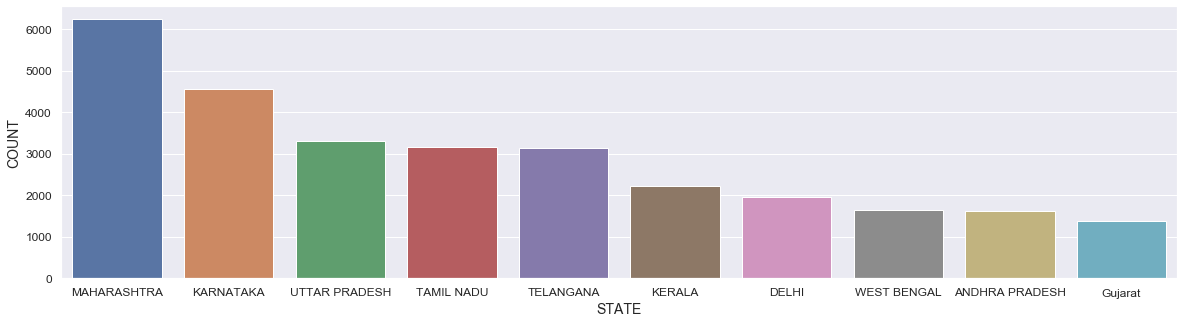

In [27]:
sns.barplot(x="state", y = "count" , data = ship_states )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("STATE",fontsize=14)
plt.ylabel("COUNT",fontsize=14)
plt.show()

##### From above  graph we can see that most of the buyers are belong to MAHARASHTA , KARNATAKA , UTTAR PRADESH AND TAMIL NADU .

# CONCLUSION

### the data analysis reveals that the business has a significant customer based in maharashtra state mainly serves retailer, fulfill order through amazon experience hai demand for t shirt and sees M-size as the  preferred choice among buyers .

## MORE ANALYSIS


### TAKING EACH STATE

In [28]:
maharashtra_analysis = df[df["ship-state"] == "MAHARASHTRA"]
city_amount_maha=maharashtra_analysis.groupby("ship-city",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

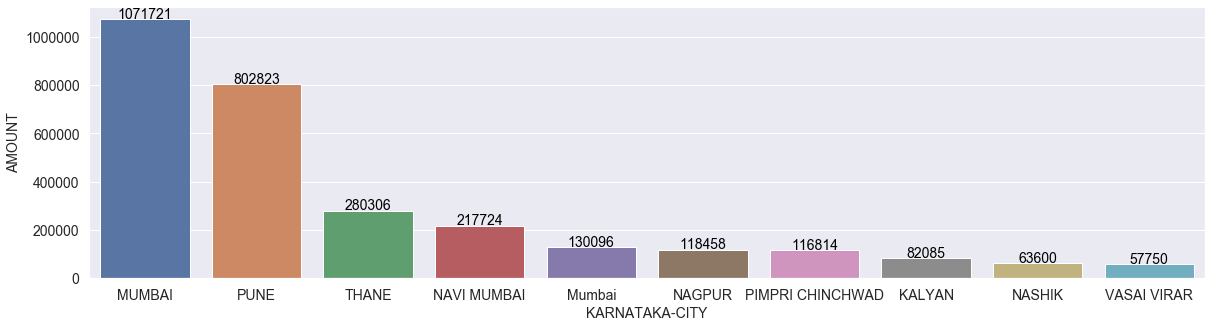

In [29]:
ax =sns.barplot(x="ship-city",y="Amount",data = city_amount_maha)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("KARNATAKA-CITY",fontsize=14)
plt.ylabel("AMOUNT",fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

##### From above graph we can say that most of the buyers  in Maharashtra are belongs to Mumbai and Pune .

In [30]:
karnataka_analysis = df[df["ship-state"] == "KARNATAKA"]
city_amount_karna=karnataka_analysis.groupby("ship-city",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)


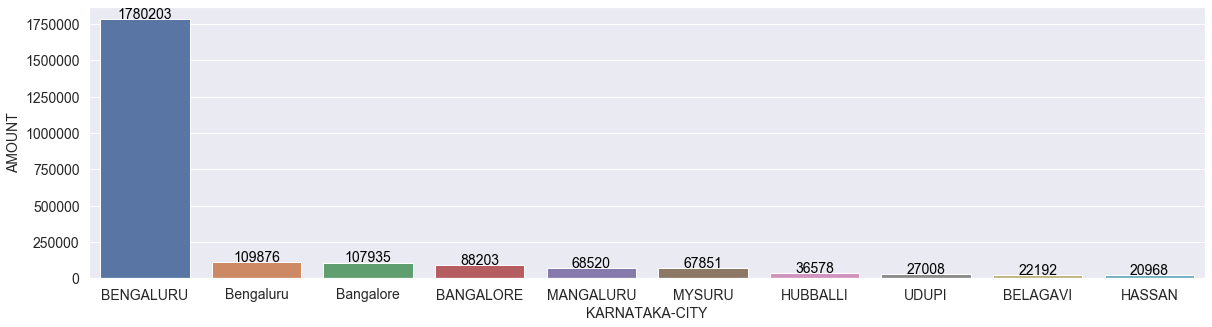

In [31]:
ax =sns.barplot(x="ship-city",y="Amount",data = city_amount_karna )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("KARNATAKA-CITY",fontsize=14)
plt.ylabel("AMOUNT",fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

##### From above graph we can say that most of the buyers  in Karnataka are belongs to Bengaluru .

In [32]:
up_analysis = df[df["ship-state"] == "UTTAR PRADESH"]
city_amount_up=up_analysis.groupby("ship-city",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)


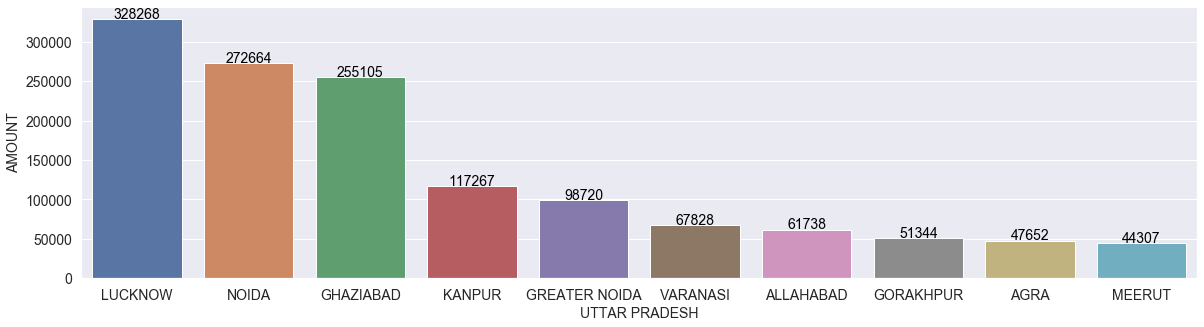

In [33]:
ax =sns.barplot(x="ship-city",y="Amount",data = city_amount_up )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("UTTAR PRADESH",fontsize=14)
plt.ylabel("AMOUNT",fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

##### From above graph we can say that most of the buyers  in Utter pradesh are belongs to Lucknow , Noida ,Ghaziabad .

In [34]:
TN_analysis = df[df["ship-state"] == "TAMIL NADU"]
city_amount_tn=TN_analysis.groupby("ship-city",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)


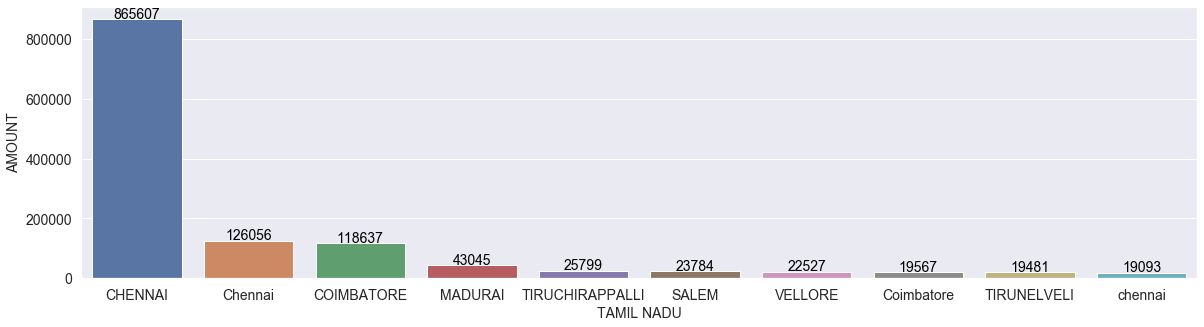

In [35]:
ax =sns.barplot(x="ship-city",y="Amount",data = city_amount_tn )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("TAMIL NADU",fontsize=14)
plt.ylabel("AMOUNT",fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

##### From above graph we can say that most of the buyers  in TAMIL NADU are belongs to CHENNAI .

### ALL STATE AT ONCE 

MAHARASHTRA-CITY


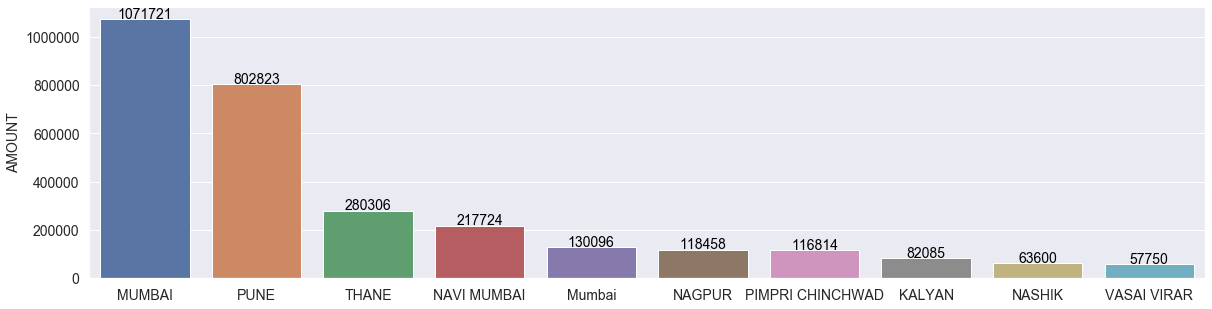

         From above graph we can say that most of the buyers  in MAHARASHTRA are belongs to MUMBAI , PUNE ,THANE.




KARNATAKA-CITY


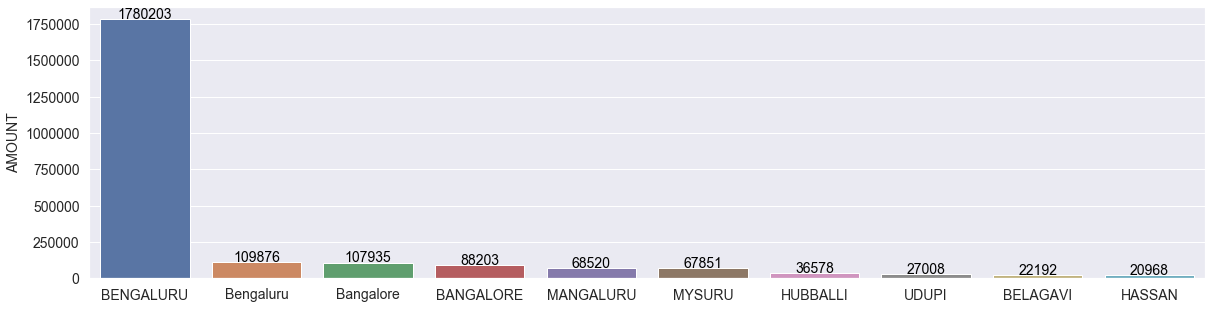

         From above graph we can say that most of the buyers  in KARNATAKA are belongs to BENGALURU , Bengaluru ,Bangalore.




UTTAR PRADESH-CITY


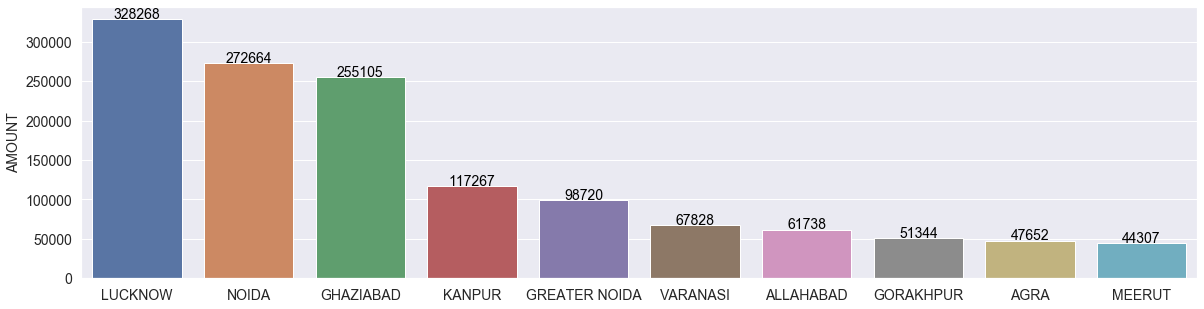

         From above graph we can say that most of the buyers  in UTTAR PRADESH are belongs to LUCKNOW , NOIDA ,GHAZIABAD.




TAMIL NADU-CITY


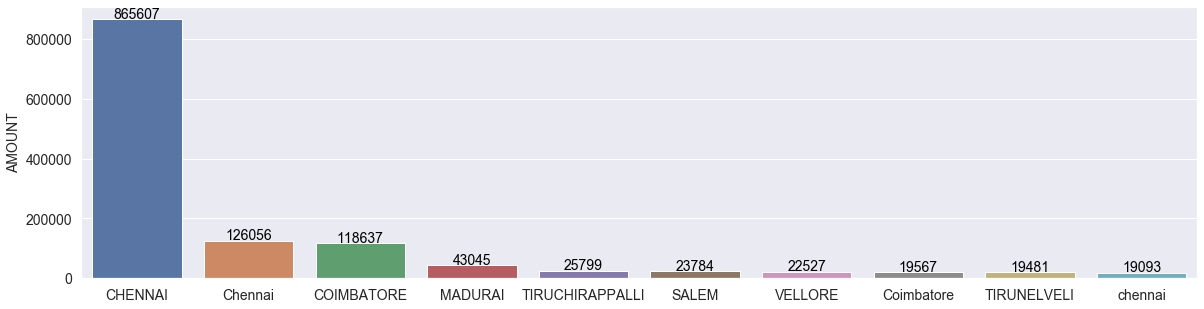

         From above graph we can say that most of the buyers  in TAMIL NADU are belongs to CHENNAI , Chennai ,COIMBATORE.




TELANGANA-CITY


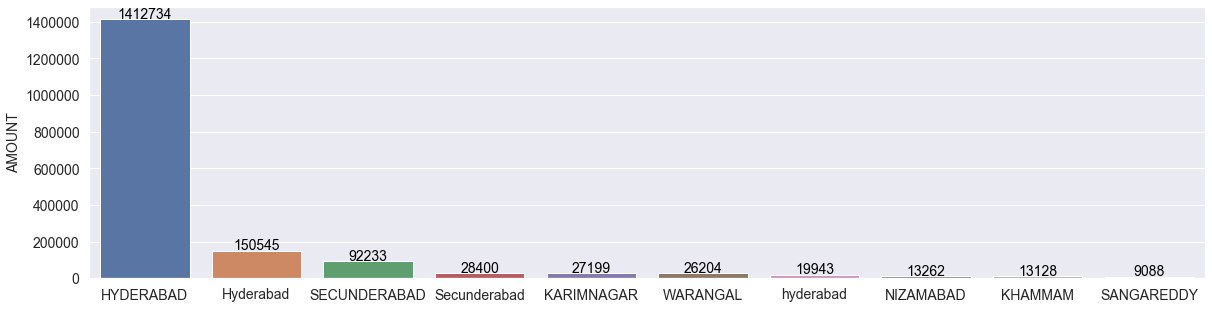

         From above graph we can say that most of the buyers  in TELANGANA are belongs to HYDERABAD , Hyderabad ,SECUNDERABAD.




KERALA-CITY


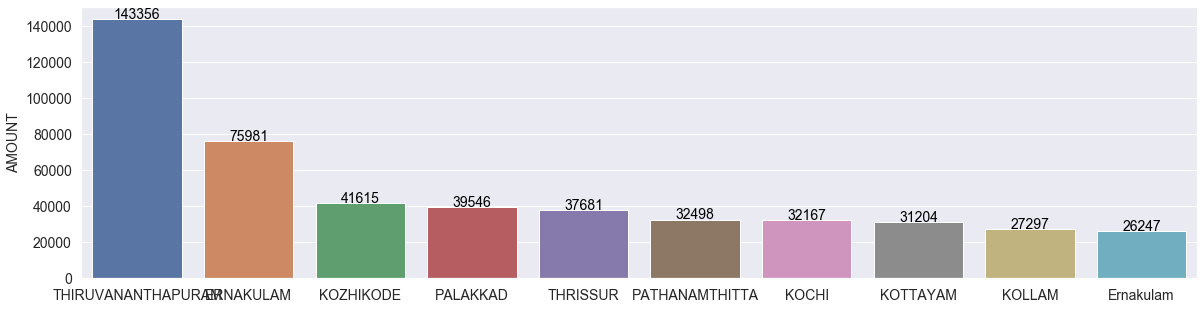

         From above graph we can say that most of the buyers  in KERALA are belongs to THIRUVANANTHAPURAM , ERNAKULAM ,KOZHIKODE.




DELHI-CITY


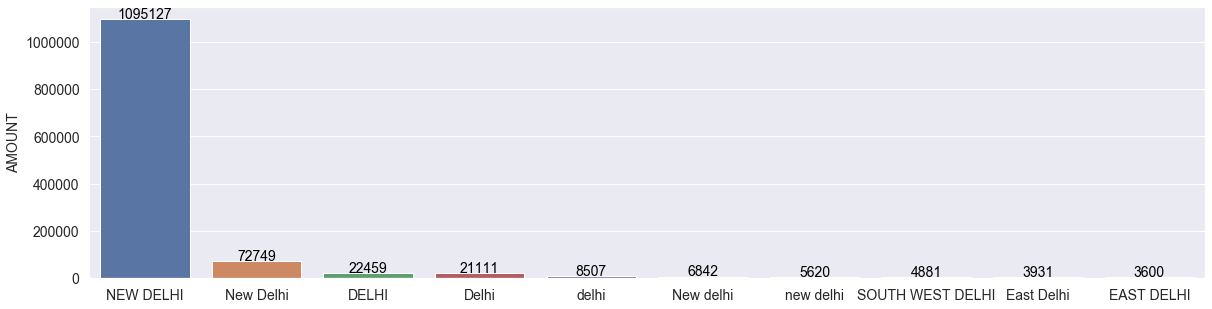

         From above graph we can say that most of the buyers  in DELHI are belongs to NEW DELHI , New Delhi ,DELHI.




WEST BENGAL-CITY


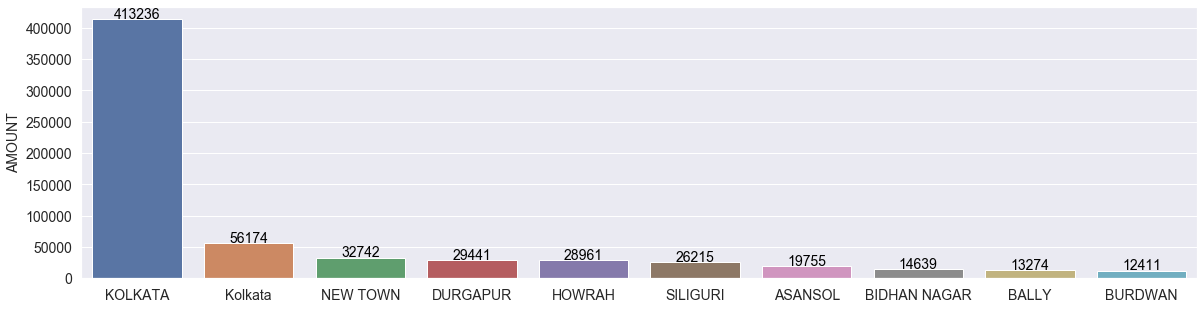

         From above graph we can say that most of the buyers  in WEST BENGAL are belongs to KOLKATA , Kolkata ,NEW TOWN.




ANDHRA PRADESH-CITY


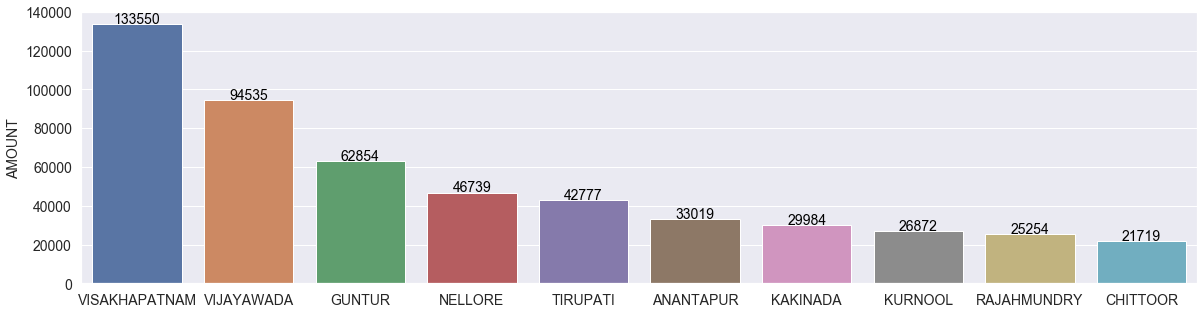

         From above graph we can say that most of the buyers  in ANDHRA PRADESH are belongs to VISAKHAPATNAM , VIJAYAWADA ,GUNTUR.




Gujarat-CITY


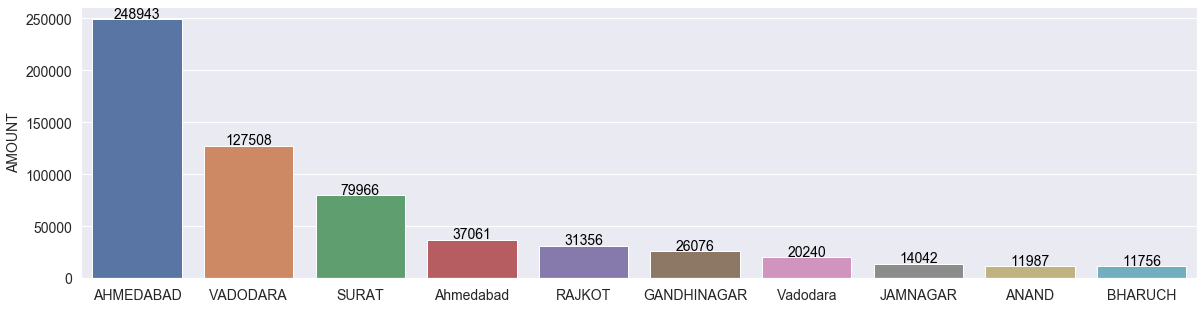

         From above graph we can say that most of the buyers  in Gujarat are belongs to AHMEDABAD , VADODARA ,SURAT.






In [36]:
for i in ship_states["state"]:
    state_analysis = df[df["ship-state"] == i]
    city_amount=state_analysis.groupby("ship-city",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10).reset_index(drop=True)
    ax =sns.barplot(x="ship-city",y="Amount",data = city_amount )
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
        textcoords='offset points')
    plt.xlabel(print(f"{i}-CITY"),fontsize=14)
    plt.ylabel("AMOUNT",fontsize=14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    print(f'         From above graph we can say that most of the buyers  in {i} are belongs to {city_amount["ship-city"][0]} , {city_amount["ship-city"][1]} ,{city_amount["ship-city"][2]}.')
    print("\n")
    print("\n")